In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data= pd.read_excel("data/5G Datset.xlsx", engine='openpyxl')
data

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,SmartPhone,600,0.010000,50,30,17500,1082,43000000,FBMC,embb
1,SmartPhone,100,0.010000,7,38,1700,2647,45000000,FBMC,embb
2,SmartPhone,240,0.000010,46,38,900,2821,65000000,FBMC,embb
3,SmartPhone,120,0.000100,12,50,900,864,77000000,FBMC,embb
4,SmartPhone,60,0.000001,49,60,1700,1945,33000000,FBMC,embb
...,...,...,...,...,...,...,...,...,...,...
2995,BlutoothDevices,180,0.010000,40,38,1700,1476,77000000,GFDM,mMTC
2996,BlutoothDevices,100,0.000010,28,29,300,512,10000000,GFDM,mMTC
2997,BlutoothDevices,180,0.000001,25,29,300,1752,65000000,GFDM,mMTC
2998,BlutoothDevices,300,0.001000,20,45,300,453,45000000,GFDM,mMTC


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   User Device Type                   3000 non-null   object 
 1   Duration(sec)                      3000 non-null   int64  
 2   Paket Loss Rate(Reliability)       3000 non-null   float64
 3   Packet Delay Budget( Latency(ms))  3000 non-null   int64  
 4   Bandwidth(GHz)                     3000 non-null   int64  
 5   Delay Rate(Mbps)                   3000 non-null   int64  
 6   Speed(Mbps)                        3000 non-null   int64  
 7   Jitter(ps)                         3000 non-null   int64  
 8   Modulation Type                    3000 non-null   object 
 9   Slice Type                         3000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 234.5+ KB


In [12]:
categoric = ['User Device Type', 'Modulation Type', 'Slice Type']
for cat in categoric:
    print("Value count for: ", cat)
    print(data[cat].unique(), data[cat].nunique())

Value count for:  User Device Type
['SmartPhone' 'AR/VR/Gaming' 'IOTDevices' 'HealthCare'
 'TansportationDevices' 'PersonalComputers' 'Industry'
 'PublicSafetyDevices' 'CommunicationDevices' 'BlutoothDevices'] 10
Value count for:  Modulation Type
['FBMC' 'UFMC' 'GFDM' 'fOFDM' 'QAM' 'OFDM'] 6
Value count for:  Slice Type
['eMBB' 'URRLC' 'mMTC'] 3


In [11]:
data['Slice Type'] = data['Slice Type'].replace({'embb': 'eMBB', 'URLLC': 'URRLC'})

In [13]:
lb = LabelEncoder()
for cat in categoric:
    data[cat] = lb.fit_transform(data[cat])
data

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget( Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type,Slice Type
0,8,600,0.010000,50,30,17500,1082,43000000,0,1
1,8,100,0.010000,7,38,1700,2647,45000000,0,1
2,8,240,0.000010,46,38,900,2821,65000000,0,1
3,8,120,0.000100,12,50,900,864,77000000,0,1
4,8,60,0.000001,49,60,1700,1945,33000000,0,1
...,...,...,...,...,...,...,...,...,...,...
2995,1,180,0.010000,40,38,1700,1476,77000000,1,2
2996,1,100,0.000010,28,29,300,512,10000000,1,2
2997,1,180,0.000001,25,29,300,1752,65000000,1,2
2998,1,300,0.001000,20,45,300,453,45000000,1,2


In [14]:
x=data.drop(['Slice Type'],axis=1)
y=data['Slice Type']

In [15]:
x.shape, y.shape

((3000, 9), (3000,))

In [16]:
scaler = MinMaxScaler()
X_data_minmax = scaler.fit_transform(x)
data = pd.DataFrame(X_data_minmax, columns=['User Device Type','Duration(sec)','Paket Loss Rate(Reliability)','Packet Delay Budget(Latency(ms))','Bandwidth(GHz)','Delay Rate(Mbps)','Speed(Mbps)','Jitter(ps)','Modulation Type'])
data

,User Device Type,Duration(sec),Paket Loss Rate(Reliability),Packet Delay Budget(Latency(ms)),Bandwidth(GHz),Delay Rate(Mbps),Speed(Mbps),Jitter(ps),Modulation Type
0,0.888889,1.000000,1.000000,1.000000,0.032258,1.000000,0.349610,0.510791,0.0
1,0.888889,0.074074,1.000000,0.122449,0.290323,0.081395,0.880298,0.539568,0.0
2,0.888889,0.333333,0.000900,0.918367,0.290323,0.034884,0.939301,0.827338,0.0
3,0.888889,0.111111,0.009901,0.224490,0.677419,0.034884,0.275687,1.000000,0.0
4,0.888889,0.000000,0.000000,0.979592,1.000000,0.081395,0.642252,0.366906,0.0
...,...,...,...,...,...,...,...,...,...
2995,0.111111,0.222222,1.000000,0.795918,0.290323,0.081395,0.483215,1.000000,0.2
2996,0.111111,0.074074,0.000900,0.551020,0.000000,0.000000,0.156324,0.035971,0.2
2997,0.111111,0.222222,0.000000,0.489796,0.000000,0.000000,0.576806,0.827338,0.2
2998,0.111111,0.444444,0.099910,0.387755,0.516129,0.000000,0.136317,0.539568,0.2


In [17]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(data, y, test_size=0.30, random_state=10)
print('Shape of X_train=',X_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of y_test=',y_test.shape)

Shape of X_train= (2100, 9)
Shape of X_test= (900, 9)
Shape of y_train= (2100,)
Shape of y_test= (900,)


In [18]:
from sklearn import svm

#clf_linear = svm.SVC(kernel='linear')
#clf_poly= svm.SVC(kernel='poly')
clf_rbf = svm.SVC(C=50,kernel='rbf',gamma=1)


In [19]:
#clf_linear1=clf_linear.fit(X_train, y_train)
#clf_poly1=clf_poly.fit(X_train, y_train)
clf_rbf1=clf_rbf.fit(X_train, y_train)

In [20]:
Yp =  clf_rbf1.predict(X_test)
#Yp =  clf_poly1.predict(X_test)

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, Yp, average= 'macro')
recall = recall_score(y_test, Yp, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, Yp))
print('F1 Score: %.3f' % f1_score(y_test, Yp, average= 'macro'))

Precision: 0.567
Recall: 0.571
Accuracy: 0.579
F1 Score: 0.568


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, Yp))

             precision    recall  f1-score   support

          0       0.58      0.59      0.59       394
          1       0.50      0.53      0.51       169
          2       0.62      0.59      0.61       337

avg / total       0.58      0.58      0.58       900



In [23]:
print (confusion_matrix(y_test, Yp))

[[232  64  98]
 [ 56  90  23]
 [111  27 199]]


# KNN

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data, y,test_size=0.20, random_state = 0)

In [38]:

knn_clf=KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
# , algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, p=1, weights='distance'
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, ypred, average= 'macro')
recall = recall_score(y_test, ypred, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, ypred))
print('F1 Score: %.3f' % f1_score(y_test, ypred, average= 'macro'))

Precision: 0.570
Recall: 0.541
Accuracy: 0.565
F1 Score: 0.551


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:', result2)

Confusion Matrix:
[[ 58  20  53]
 [ 13 120  68]
 [ 22  57 189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.44      0.52       131
           1       0.61      0.60      0.60       201
           2       0.61      0.71      0.65       268

    accuracy                           0.61       600
   macro avg       0.61      0.58      0.59       600
weighted avg       0.61      0.61      0.61       600

Accuracy: 0.6116666666666667


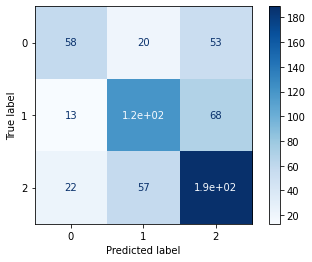

In [50]:
plot_confusion_matrix(knn_clf,X_test,y_test,cmap=plt.cm.Blues)

**MLP**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
print(X_train.shape); print(X_test.shape)

(2400, 9)
(600, 9)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
precision = precision_score(y_test, predict_test, average= 'macro')
recall = recall_score(y_test, predict_test, average= 'macro')
print('Precision: %.3f' %precision)
print('Recall: %.3f' %recall)
print('Accuracy: %.3f' % accuracy_score(y_test, predict_test))
print('F1 Score: %.3f' % f1_score(y_test, predict_test, average= 'macro'))

Precision: 0.149
Recall: 0.333
Accuracy: 0.447
F1 Score: 0.206


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[   0    0  500]
 [   0    0  869]
 [   0    0 1031]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.00      0.00      0.00       869
           2       0.43      1.00      0.60      1031

    accuracy                           0.43      2400
   macro avg       0.14      0.33      0.20      2400
weighted avg       0.18      0.43      0.26      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**DBN**

In [12]:
from dbn.tensorflow import SupervisedDBNClassification

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, y,test_size=0.20, random_state = 0)

In [23]:
# digits = pd.read_csv("train.csv")
# from sklearn.preprocessing import standardscaler
# X = np.array(digits.drop(["label"], axis=1))
# Y = np.array(digits["label"])
# ss=standardscaler()
# X = ss.fit_transform(X)
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
classifier = SupervisedDBNClassification(hidden_layers_structure =[256, 256], learning_rate_rbm=0.05, learning_rate=0.1, n_epochs_rbm=10, n_iter_backprop=100, batch_size=32, activation_function='relu', dropout_p=0.2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('\nAccuracy of Prediction: %f' % accuracy_score(X_test, y_pred))

[START] Pre-training step:


KeyError: "None of [Int64Index([2019,  976, 1524, 1030,  628,  968, 1817,   47,  246, 1833,\n            ...\n            2368, 1244,  728,  951,  305, 1292, 2291,  496, 1546, 2361],\n           dtype='int64', length=2400)] are in the [columns]"